## Data Extraction

A notebook for data extraction (enzyme concentration and decay rate) from the DEMENT output

In [1]:
options(repr.plot.width = 4, repr.plot.height = 4)
options(jupyter.plot_mimetypes = "image/png")

- 30: 180530164001
- 25: 180530164301
- 22: 180530164401
- 20: 180530164501
- 18: 180530164551
- 17: 180530164601
- 15: 180530164701
- 12: 180530164801
- 11: 180530164901
- 10.5: 180530164906
- 10: 180530165001
- 9.5: 180530165201
- 9: 180530165301
- 8.5: 180530165401
- 8: 180530165501
- 7: 180530165506
- 6: 180530165508
- 5: 180530165511
- 4: 180530165514
- 3: 180530165516
- 2: 180530165521
- 1: 180530165526

In [2]:
Enz_rate <- c(30,25,22,20,18,17,15,12,11,10.5,10,9.5,9,8.5,8,7,6,5,4,3,2,1)
length(Enz_rate)

[1] 22

In [3]:
load("180530164701.RData",ex <- new.env()) 
ls.str(ex)
out <- ex$out[[1]]

args :  chr [1:2] "20180530164700" "0001"
expand : function (x, grid.size)  
filename :  chr "outputs/180530164701.RData"
job.time :  chr "20180530164700"
MakePlots : function (out)  
myImagePlot : function (x, ...)  
out : List of 1
 $ :List of 51
plot.grid : function (grid, x, zlim = NULL, title = "")  
ptm : Class 'proc_time'  Named num [1:5] 0.064 0.031 0.342 0.003 0.006
RunPulse : function (params, timestamp, rng.seed, grid.size, Microbes, Substrates, 
    SubInput, Enzymes, Monomers, MonInput, MonomersProduced, ReprodNew, 
    Colonization.reset, Ea, Vmax0, Km0, ReqEnz, EnzGenes, EnzProdInduce, 
    EnzProdConstit, UptakeGenes, UptakeGenesForEnz, Uptake_ReqEnz, EnzAttrib, 
    Uptake_Ea, Uptake_Vmax0, Uptake_Km0, CUE.ref, OptimalRatios, MinRatios, 
    RangeRatios, fb, Temp, Psi, Tolerance)  
sum.grid : function (x, rn, grid.size)  
task.ID :  num 1
TraitModel : function (job.time, task.ID)  

In [4]:
attributes(out)

$names
 [1] "params"                           "seed"                            
 [3] "Ea"                               "Uptake_Ea"                       
 [5] "Vmax"                             "Uptake_Vmax"                     
 [7] "Km"                               "Uptake_Km"                       
 [9] "ReqEnz"                           "Uptake_ReqEnz"                   
[11] "OptimalRatios"                    "RangeRatios"                     
[13] "EnzGenes"                         "EnzProdInduce"                   
[15] "EnzProdConstit"                   "UptakeGenes"                     
[17] "UptakeGenesForEnz"                "EnzAttrib"                       
[19] "MonInput"                         "SubInput"                        
[21] "CUE"                              "RespSeries"                      
[23] "EnzymesSeries"                    "SubstratesSeries"                
[25] "MonomersSeries"                   "NH4Series"                       
[27] "PO4Series"                        "MicrobesSeries"                  
[29] "MicrobesNSeries"                  "MicrobesPSeries"                 
[31] "MicrobesNPSeries"                 "DecayRatesSeries"                
[33] "Enzyme_subSeries"                 "grid"                            
[35] "grid.time"                        "grid.size"                       
[37] "corr.vec"                         "cor.test"                        
[39] "end_time"                         "Mic_Sum"                         
[41] "Substrate_Sum"                    "Monomer_Sum"                     
[43] "Enzyme_Sum"                       "timestamp"                       
[45] "fb"                               "Temp"                            
[47] "Psi"                              "Tolerance"                       
[49] "RecoveredC_Resp_Sub_Mon_Enz_Mic"  "RecoveredN_Leach_Sub_Mon_Enz_Mic"
[51] "RecoveredP_Leach_Sub_Mon_Enz_Mic"

# substrate

In [7]:
Substrate_series <- out$SubstratesSeries
head(Substrate_series)
dim(Substrate_series)
xx <- Substrate_series[-1,3]

,DeadMic,DeadEnz,Cellulose,Hemicellulose,Starch,Chitin,Lignin,Protein1,Protein2,Protein3,OrgP1,OrgP2
SubstratesSeries,0.0000000,0.00000000,1468900,858550.0,122100.0,49952.00,485100.0,106000.0,106000.0,106000.0,124800.0,18182.00
,0.0000000,0.00000000,1472924,860902.0,122435.0,50089.00,486429.0,106290.0,106290.0,106290.0,125142.0,18232.00
,0.0000000,0.02378182,1472923,860901.5,122434.6,50088.95,486428.8,106289.5,106289.2,106289.8,125141.7,18231.95
,0.0000000,0.06973392,1472921,860900.6,122433.8,50088.84,486428.4,106288.6,106287.5,106289.3,125141.2,18231.85
,0.8788918,0.13635886,1472919,860899.2,122432.7,50088.69,486427.9,106287.3,106285.1,106288.7,125140.4,18231.71
,0.8788918,0.22226515,1472916,860897.4,122431.2,50088.49,486427.2,106285.6,106282.1,106287.9,125139.4,18231.52


[1] 301  12

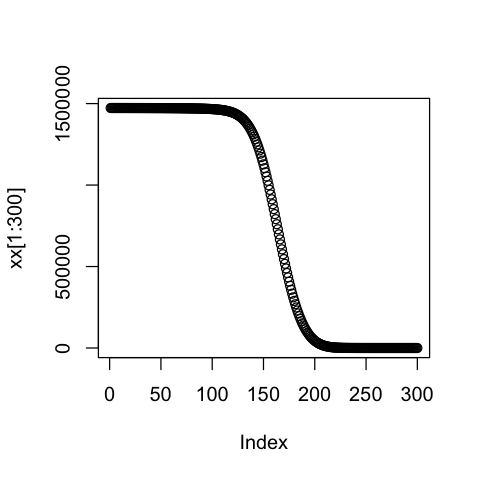

In [23]:
plot(xx[1:300])

x <- xx[1:300]
write.csv(x,'/Users/Ben/Desktop/Soil system/Microbial System Projects/Enzyme_kinetics/DEMENT_BW/Analysis/Data6/Distribution/Rate_Enz_Sub/Cellulose.csv')

## Enzyme

In [4]:
Enzyme_Sub <- out$Enzyme_subSeries
colnames <- rownames(Enzyme_Sub)[1:12]
Enzyme_Sub1 <- matrix(t(Enzyme_Sub),ncol=12,byrow=T)
colnames(Enzyme_Sub1) <- colnames
head(Enzyme_Sub1)

DeadMic,DeadEnz,Cellulose,Hemicellulose,Starch,Chitin,Lignin,Protein1,Protein2,Protein3,OrgP1,OrgP2
0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000
0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000
0,0.09909091,0.05945455,0.01981818,0.05945455,0.01981818,0.01981818,0.07927273,0.1387273,0.03963636,0.03963636,0.03963636
0,0.19162363,0.11497418,0.03832473,0.11497418,0.03832473,0.03832473,0.15329891,0.2682731,0.07664945,0.07664945,0.07664945
0,0.27827045,0.16696227,0.05565409,0.16696227,0.05565409,0.05565409,0.22261636,0.3895786,0.11130818,0.11130818,0.11130818
0,0.35962722,0.21577633,0.07192544,0.21577633,0.07192544,0.07192544,0.28770178,0.5034781,0.14385089,0.14385089,0.14385089


In [5]:
colnames <- rownames(Enzyme_Sub)[1:12]
colnames

[1] "DeadMic"       "DeadEnz"       "Cellulose"     "Hemicellulose"
 [5] "Starch"        "Chitin"        "Lignin"        "Protein1"     
 [9] "Protein2"      "Protein3"      "OrgP1"         "OrgP2"

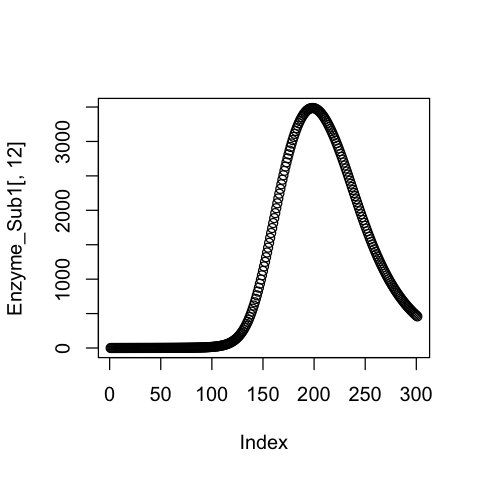

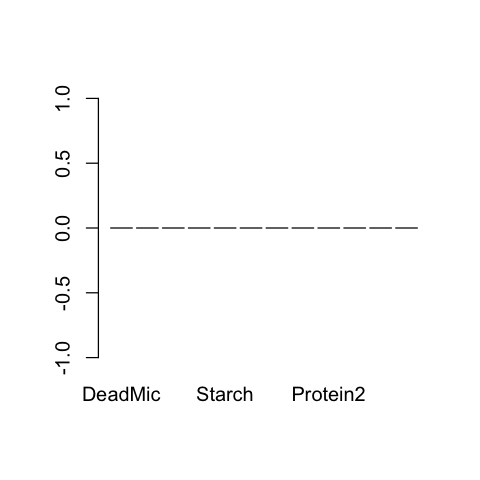

In [7]:
plot(Enzyme_Sub1[,12])
barplot(Enzyme_Sub1[1,])
y <- Enzyme_Sub1[2:301,3]
#write.csv(y,'/Users/Ben/Desktop/Soil system/Micobial System Projects/Enzyme_kinetics/DEMENT_BW/Analysis/Data6/Distribution/Rate_Enz_Sub/Cellulose_Enzyme.csv')

## Decay Rate

In [6]:
decayrate <- out$DecayRatesSeries
colnames <- rownames(decayrate)[1:12]
decayrate1 <- matrix(t(decayrate),ncol=12,byrow=T)
colnames(decayrate1) <- colnames
head(decayrate1)

DeadMic,DeadEnz,Cellulose,Hemicellulose,Starch,Chitin,Lignin,Protein1,Protein2,Protein3,OrgP1,OrgP2
0,0.0000000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000
0,0.0000000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000
0,0.0000000000,1.305426,0.7192963,0.5954849,0.09271815,0.2841668,0.8244212,1.489872,0.3986397,0.4278778,0.1272887
0,0.0001044922,2.510765,1.3834361,1.1449961,0.17831493,0.5465501,1.5850375,2.863531,0.7665946,0.8228076,0.2447505
0,0.0004410283,3.627849,1.9989291,1.6535420,0.25761525,0.7897300,2.2885914,4.132051,1.1073300,1.1884930,0.3534563
0,0.0011052324,4.666870,2.5713832,2.1254762,0.33133114,1.0159281,2.9409648,5.305218,1.4238455,1.5281416,0.4543369


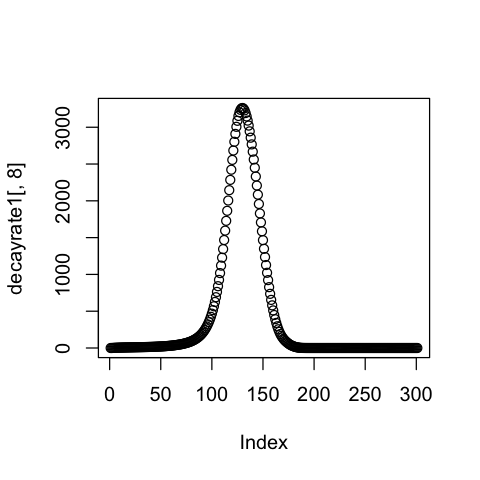

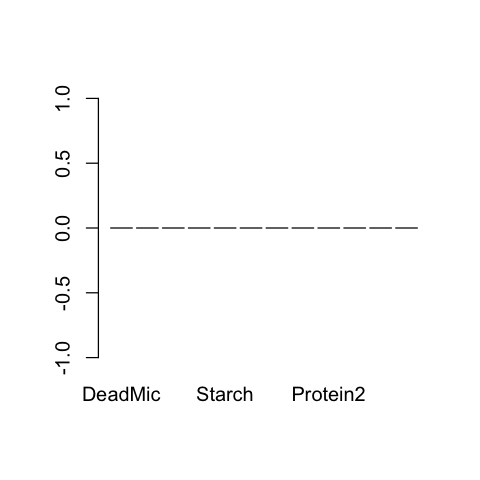

In [7]:
plot(decayrate1[,8])
barplot(decayrate1[1,])
x <- decayrate1[2:301,]
#write.csv(x,"/Users/Ben/Desktop/Soil system/Micobial System Projects/Enzyme_kinetics/DEMENT_BW/Analysis/Data6/Decayrates_180530164401.csv")

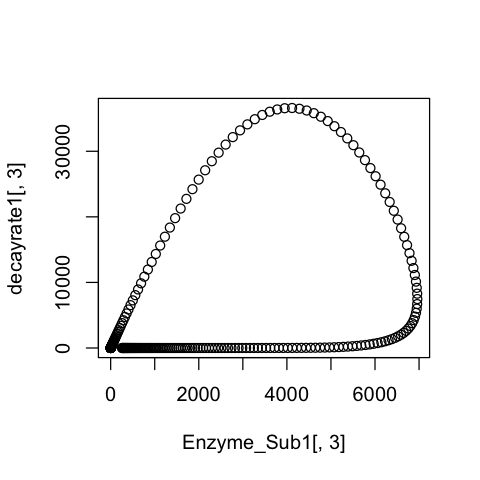

In [8]:
plot(Enzyme_Sub1[,3],decayrate1[,3])

In [9]:
colname_Enz <- c('DeadMic_Enz','DeadEnz_Enz','Cellulose_Enz','Hemicellulose_Enz','Starch_Enz', 
             'Chitin_Enz','Lignin_Enz','Protein1_Enz','Protein2_Enz','Protein3_Enz','OrgP1_Enz','OrgP2_Enz')

colnames(Enzyme_Sub1) <-colname_Enz
head(Enzyme_Sub1)

DeadMic_Enz,DeadEnz_Enz,Cellulose_Enz,Hemicellulose_Enz,Starch_Enz,Chitin_Enz,Lignin_Enz,Protein1_Enz,Protein2_Enz,Protein3_Enz,OrgP1_Enz,OrgP2_Enz
0,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000
0,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000
0,0.1453333,0.0872000,0.02906667,0.0872000,0.02906667,0.02906667,0.1162667,0.2034667,0.05813333,0.05813333,0.05813333
0,0.2795292,0.1677175,0.05590583,0.1677175,0.05590583,0.05590583,0.2236233,0.3913408,0.11181167,0.11181167,0.11181167
0,0.4039112,0.2423467,0.08078225,0.2423467,0.08078225,0.08078225,0.3231290,0.5654757,0.16156449,0.16156449,0.16156449
0,0.5196189,0.3117713,0.10392378,0.3117713,0.10392378,0.10392378,0.4156951,0.7274665,0.20784756,0.20784756,0.20784756


In [10]:
colname_Rate <- c('DeadMic_Rate','DeadEnz_Rate','Cellulose_Rate','Hemicellulose_Rate','Starch_Rate', 
             'Chitin_Rate','Lignin_Rate','Protein1_Rate','Protein2_Rate','Protein3_Rate','OrgP1_Rate','OrgP2_Rate')

colnames(decayrate1) <- colname_Rate
head(decayrate1)

DeadMic_Rate,DeadEnz_Rate,Cellulose_Rate,Hemicellulose_Rate,Starch_Rate,Chitin_Rate,Lignin_Rate,Protein1_Rate,Protein2_Rate,Protein3_Rate,OrgP1_Rate,OrgP2_Rate
0,0.0000000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000
0,0.0000000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000
0,0.0000000000,1.305426,0.7192963,0.5954849,0.09271815,0.2841668,0.8244212,1.489872,0.3986397,0.4278778,0.1272887
0,0.0001044922,2.510765,1.3834361,1.1449961,0.17831493,0.5465501,1.5850375,2.863531,0.7665946,0.8228076,0.2447505
0,0.0004410283,3.627849,1.9989291,1.6535420,0.25761525,0.7897300,2.2885914,4.132051,1.1073300,1.1884930,0.3534563
0,0.0011052324,4.666870,2.5713832,2.1254762,0.33133114,1.0159281,2.9409648,5.305218,1.4238455,1.5281416,0.4543369


In [11]:
Rate_Enz <- cbind(Enzyme_Sub1,decayrate1)
head(Rate_Enz)

DeadMic_Enz,DeadEnz_Enz,Cellulose_Enz,Hemicellulose_Enz,Starch_Enz,Chitin_Enz,Lignin_Enz,Protein1_Enz,Protein2_Enz,Protein3_Enz,⋯,Cellulose_Rate,Hemicellulose_Rate,Starch_Rate,Chitin_Rate,Lignin_Rate,Protein1_Rate,Protein2_Rate,Protein3_Rate,OrgP1_Rate,OrgP2_Rate
0,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,⋯,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000
0,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,⋯,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000
0,0.1453333,0.0872000,0.02906667,0.0872000,0.02906667,0.02906667,0.1162667,0.2034667,0.05813333,⋯,1.305426,0.7192963,0.5954849,0.09271815,0.2841668,0.8244212,1.489872,0.3986397,0.4278778,0.1272887
0,0.2795292,0.1677175,0.05590583,0.1677175,0.05590583,0.05590583,0.2236233,0.3913408,0.11181167,⋯,2.510765,1.3834361,1.1449961,0.17831493,0.5465501,1.5850375,2.863531,0.7665946,0.8228076,0.2447505
0,0.4039112,0.2423467,0.08078225,0.2423467,0.08078225,0.08078225,0.3231290,0.5654757,0.16156449,⋯,3.627849,1.9989291,1.6535420,0.25761525,0.7897300,2.2885914,4.132051,1.1073300,1.1884930,0.3534563
0,0.5196189,0.3117713,0.10392378,0.3117713,0.10392378,0.10392378,0.4156951,0.7274665,0.20784756,⋯,4.666870,2.5713832,2.1254762,0.33133114,1.0159281,2.9409648,5.305218,1.4238455,1.5281416,0.4543369


In [12]:
library(ggplot2)

### color in R: http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

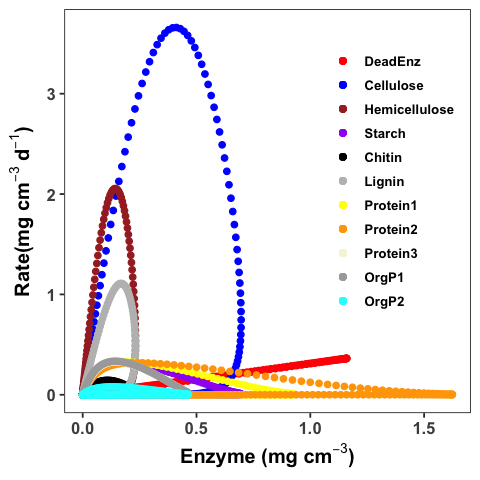

In [14]:
options(repr.plot.width = 4, repr.plot.height = 4)

Fig<-ggplot()+
  geom_point(aes(x=Rate_Enz[,2]/10000,y=Rate_Enz[,14]/10000,col='DeadEnz'))+
  geom_point(aes(x=Rate_Enz[,3]/10000,y=Rate_Enz[,15]/10000,col='Cellulose'))+
  geom_point(aes(x=Rate_Enz[,4]/10000,y=Rate_Enz[,16]/10000,col='Hemicellulose'))+
  geom_point(aes(x=Rate_Enz[,5]/10000,y=Rate_Enz[,17]/10000,col='Starch'))+
  geom_point(aes(x=Rate_Enz[,6]/10000,y=Rate_Enz[,18]/10000,col='Chitin'))+
  geom_point(aes(x=Rate_Enz[,7]/10000,y=Rate_Enz[,19]/10000,col='Lignin'))+
  geom_point(aes(x=Rate_Enz[,8]/10000,y=Rate_Enz[,20]/10000,col='Protein1'))+
  geom_point(aes(x=Rate_Enz[,9]/10000,y=Rate_Enz[,21]/10000,col='Protein2'))+
  geom_point(aes(x=Rate_Enz[,10]/10000,y=Rate_Enz[,22]/10000,col='Protein3'))+
  geom_point(aes(x=Rate_Enz[,11]/10000,y=Rate_Enz[,23]/10000,col='OrgP1'))+
  geom_point(aes(x=Rate_Enz[,12]/10000,y=Rate_Enz[,24]/10000,col='OrgP2'))+

  labs(x=expression(bold("Enzyme (mg"*" "*"cm"^-3*")")),
       y=expression(bold("Rate(mg"*" "*"cm"^-3*" "*"d"^-1*")")))+
  scale_colour_manual("", 
                      breaks = c('DeadEnz','Cellulose','Hemicellulose','Starch','Chitin',
                                 'Lignin','Protein1','Protein2','Protein3','OrgP1','OrgP2'),
                      values = c('DeadEnz'='red','Cellulose'='blue','Hemicellulose'='brown','Starch'='purple',
                                 'Chitin'='black','Lignin'='grey','Protein1'='yellow','Protein2'='orange',
                                 'Protein3'='beige','OrgP1'='dark grey','OrgP2'='cyan'))+
  theme_bw()+
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        axis.text  = element_text(size=10,face="bold"),
        axis.title = element_text(size=12,face="plain"),
        legend.position=c(0.8,0.6),
        legend.key.width = unit(0.3,"in"),
        legend.key.height= unit(0.2,"in"),
        legend.text = element_text(size = 8, face = "bold"))


# pdf(file="Tempo_Rate_Enz.pdf", width=4, height=4)
Fig
# dev.off()